In [2]:
import os
import sys
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

REPORT_NAME : str = "backtest_fibonacci_d_mv_crypto"
CACHE_CANDLES : str = f"{os.path.dirname(sys.path[0])}\\cache\\candles"

### BTC

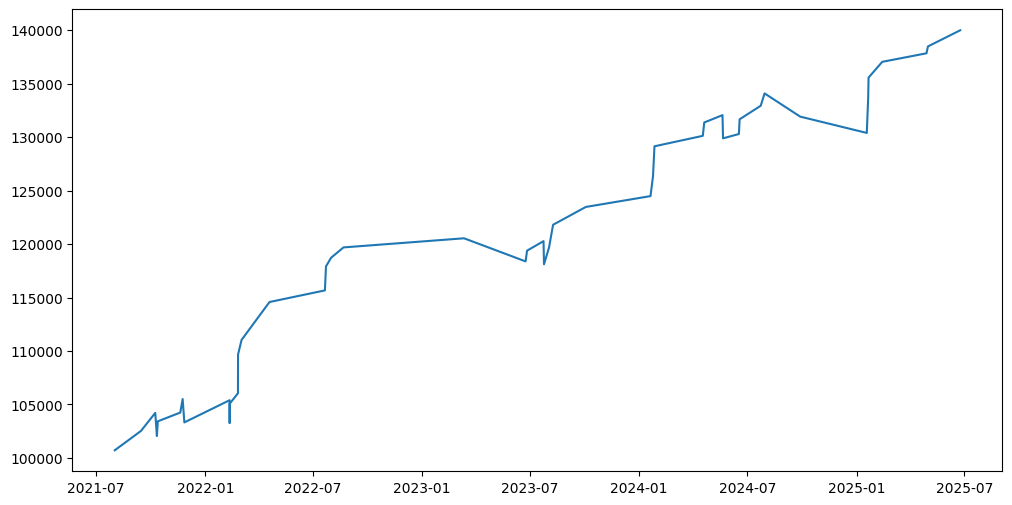

In [3]:
initial_cash = 100000
trade_file = 'backtest_fibonacci_strategy_d_mv_crypto_20210301_BTCUSDTUSDT_trades.csv'

pd_flattenned_trades = pd.read_csv(trade_file)
# pd_flattenned_trades = pd_flattenned_trades[pd_flattenned_trades.name_exclude_start_date==target_scenario_name]
pd_flattenned_trades = pd_flattenned_trades[(pd_flattenned_trades.reason!='entry') & (pd_flattenned_trades.reason!='HC')]
pd_flattenned_trades = pd_flattenned_trades.loc[:,['trade_datetime', 'trade_year', 'trade_month', 'trade_day', 'trade_pnl_less_comm']]
pd_flattenned_trades.sort_values(by=['trade_datetime'], ascending=[True])
pd_flattenned_trades['trade_datetime'] = pd.to_datetime(pd_flattenned_trades['trade_datetime'])
# pd_flattenned_trades = pd_flattenned_trades[pd_flattenned_trades['trade_datetime']>=datetime(2024,1,1)] # If you want to zoom in ...
pd_flattenned_trades['total_equity'] = pd_flattenned_trades['trade_pnl_less_comm'].cumsum()
pd_flattenned_trades['total_equity'] = pd_flattenned_trades['total_equity'] + initial_cash 
pd_flattenned_trades['interval_return'] = pd_flattenned_trades['total_equity'].pct_change()
pd_flattenned_trades['cumulative_interval_return'] = (1 + pd_flattenned_trades['interval_return']).cumprod()
pd_flattenned_trades['trade_datetime'] = pd.to_datetime(pd_flattenned_trades['trade_datetime'])
pd_flattenned_trades.set_index('trade_datetime', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(pd_flattenned_trades.index, pd_flattenned_trades['total_equity'], label='Total Equity')

                     Strategy
-------------------  ----------
Start Period         2021-09-14
End Period           2025-06-24
Risk-Free Rate       5.0%
Time in Market       100.0%

Cumulative Return    39.0%
CAGR﹪               532.3%

Sharpe               8.51
Prob. Sharpe Ratio   99.76%
Sortino              15.0
Sortino/√2           10.61
Omega                3.27

Max Drawdown         -2.76%
Max DD Date          2025-01-18
Max DD Period Start  2024-09-27
Max DD Period End    2025-01-20
Longest DD Days      115

Gain/Pain Ratio      2.86
Gain/Pain (1M)       6.96

Payoff Ratio         0.73
Profit Factor        3.36
Common Sense Ratio   4.13
CPC Index            2.0
Tail Ratio           1.23
Outlier Win Ratio    2.58
Outlier Loss Ratio   1.17

MTD                  1.09%
3M                   2.15%
6M                   6.12%
YTD                  6.12%
1Y                   6.32%
3Y (ann.)            344.42%
5Y (ann.)            532.3%
10Y (ann.)           532.3%
All-time (ann.)      532.

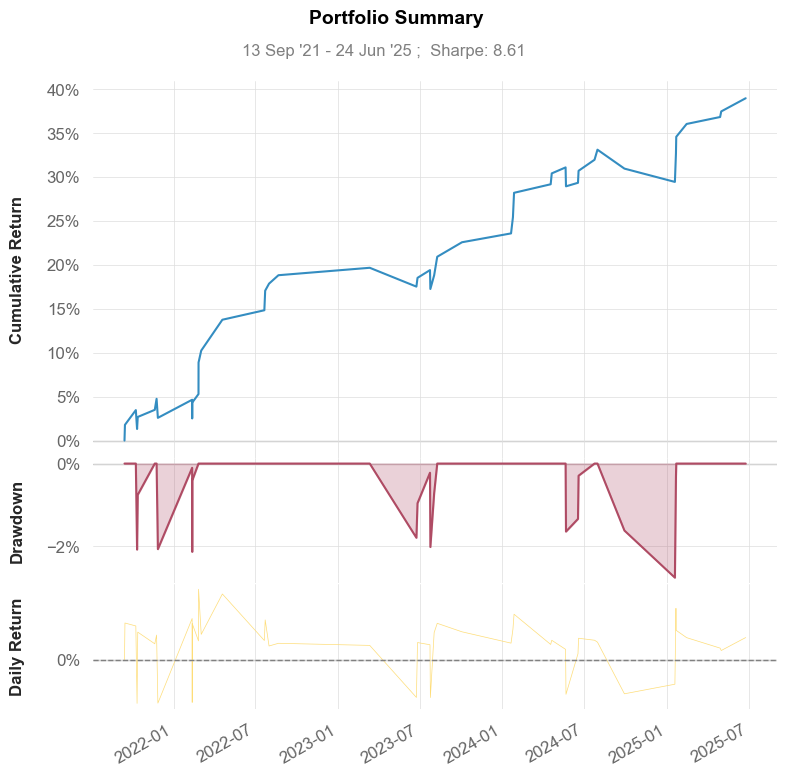

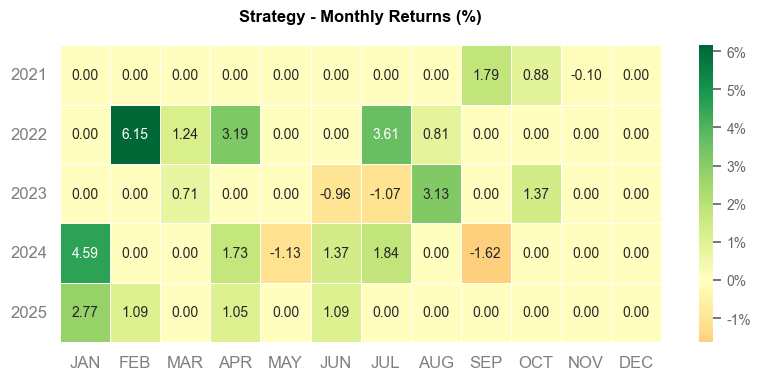

In [4]:
# https://github.com/ranaroussi/quantstats
%matplotlib inline
import quantstats as qs

RISK_FREE_RATE = 0.05 # 5%

qs.reports.basic(
    returns=pd_flattenned_trades['interval_return'], 
    rf=RISK_FREE_RATE,
    title="Tear Sheet"
    )